In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
def grab_col_names(dataframe,cat_th=30,car_th=40):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes!="O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and dataframe[col].dtypes=="O"]
    cat_cols = cat_cols+num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car

train_cat_cols, train_num_cols, train_cat_but_car = grab_col_names(train_df)
test_cat_cols, test_num_cols, test_cat_but_car = grab_col_names(test_df)

In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block=True)

          MSZoning      Ratio
MSZoning                     
RL            1151  78.835616
RM             218  14.931507
FV              65   4.452055
RH              16   1.095890
C (all)         10   0.684932
##########################################


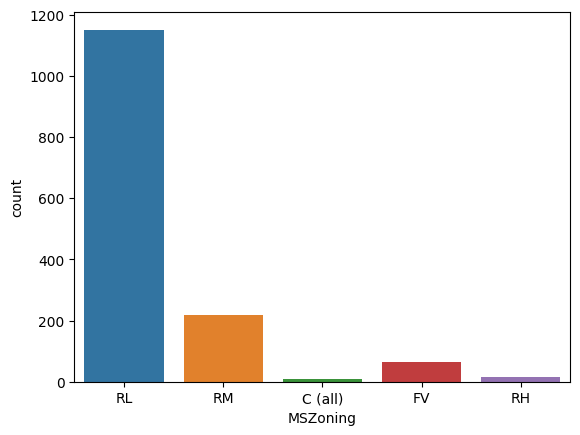

None
        Street      Ratio
Street                   
Pave      1454  99.589041
Grvl         6   0.410959
##########################################


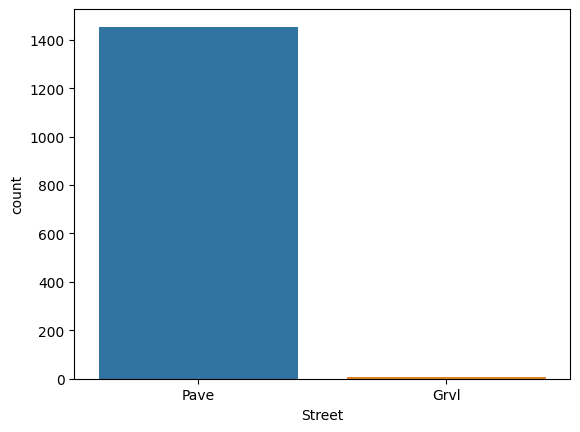

None
       Alley     Ratio
Alley                 
Grvl      50  3.424658
Pave      41  2.808219
##########################################


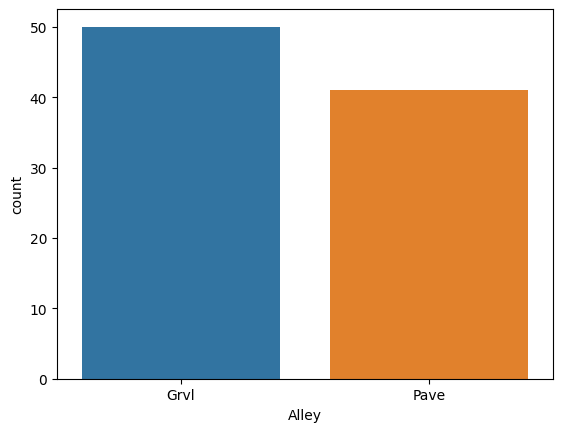

None
          LotShape      Ratio
LotShape                     
Reg            925  63.356164
IR1            484  33.150685
IR2             41   2.808219
IR3             10   0.684932
##########################################


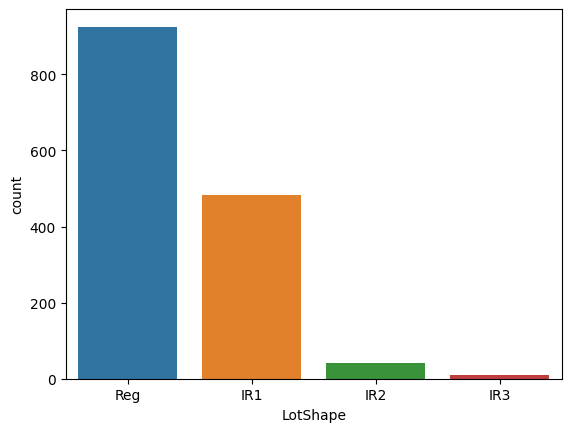

None
             LandContour      Ratio
LandContour                        
Lvl                 1311  89.794521
Bnk                   63   4.315068
HLS                   50   3.424658
Low                   36   2.465753
##########################################


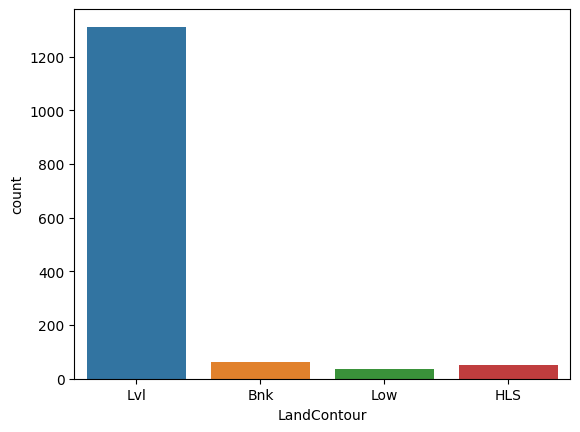

None
           Utilities      Ratio
Utilities                      
AllPub          1459  99.931507
NoSeWa             1   0.068493
##########################################


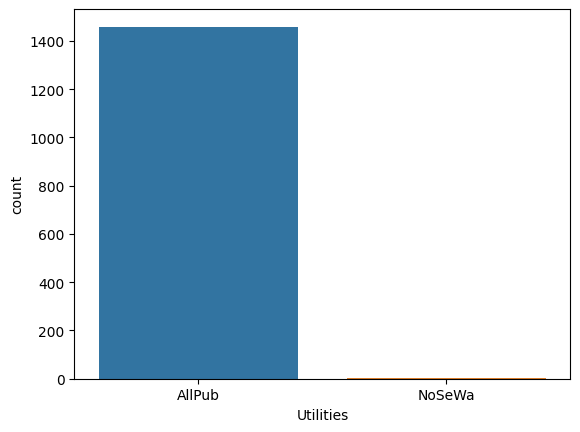

None
           LotConfig      Ratio
LotConfig                      
Inside          1052  72.054795
Corner           263  18.013699
CulDSac           94   6.438356
FR2               47   3.219178
FR3                4   0.273973
##########################################


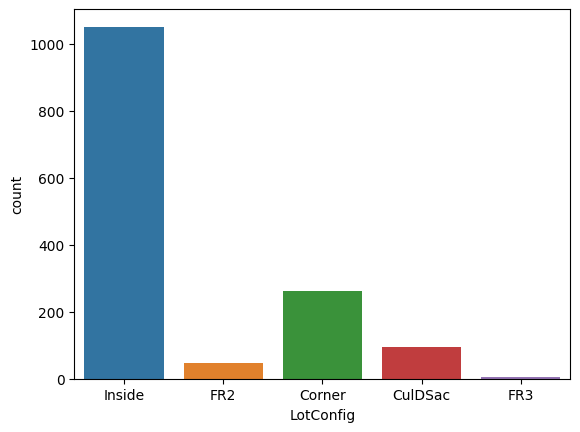

None
           LandSlope      Ratio
LandSlope                      
Gtl             1382  94.657534
Mod               65   4.452055
Sev               13   0.890411
##########################################


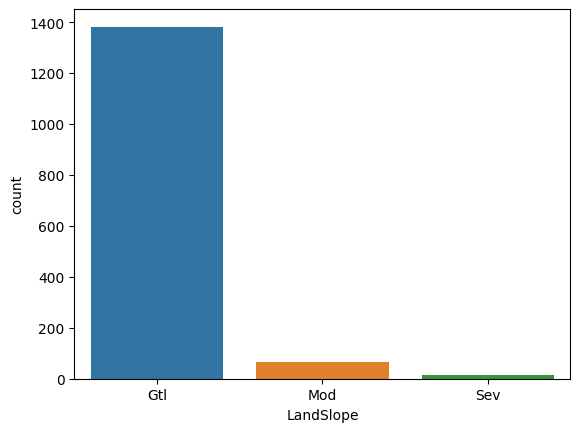

None
              Neighborhood      Ratio
Neighborhood                         
NAmes                  225  15.410959
CollgCr                150  10.273973
OldTown                113   7.739726
Edwards                100   6.849315
Somerst                 86   5.890411
Gilbert                 79   5.410959
NridgHt                 77   5.273973
Sawyer                  74   5.068493
NWAmes                  73   5.000000
SawyerW                 59   4.041096
BrkSide                 58   3.972603
Crawfor                 51   3.493151
Mitchel                 49   3.356164
NoRidge                 41   2.808219
Timber                  38   2.602740
IDOTRR                  37   2.534247
ClearCr                 28   1.917808
StoneBr                 25   1.712329
SWISU                   25   1.712329
MeadowV                 17   1.164384
Blmngtn                 17   1.164384
BrDale                  16   1.095890
Veenker                 11   0.753425
NPkVill                  9   0.616438
Blueste

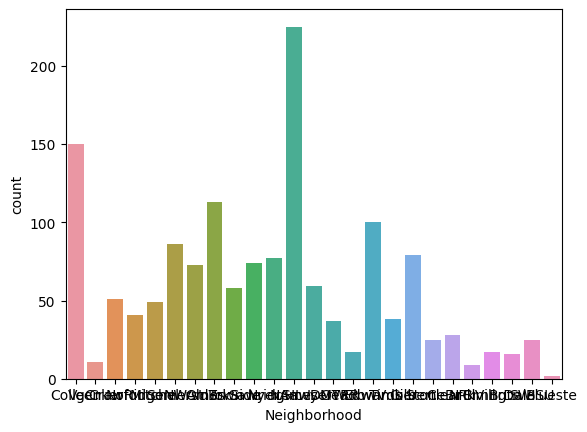

None
            Condition1      Ratio
Condition1                       
Norm              1260  86.301370
Feedr               81   5.547945
Artery              48   3.287671
RRAn                26   1.780822
PosN                19   1.301370
RRAe                11   0.753425
PosA                 8   0.547945
RRNn                 5   0.342466
RRNe                 2   0.136986
##########################################


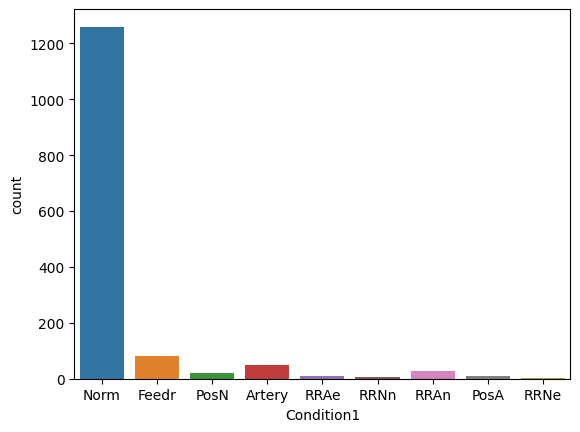

None
            Condition2      Ratio
Condition2                       
Norm              1445  98.972603
Feedr                6   0.410959
Artery               2   0.136986
RRNn                 2   0.136986
PosN                 2   0.136986
PosA                 1   0.068493
RRAn                 1   0.068493
RRAe                 1   0.068493
##########################################


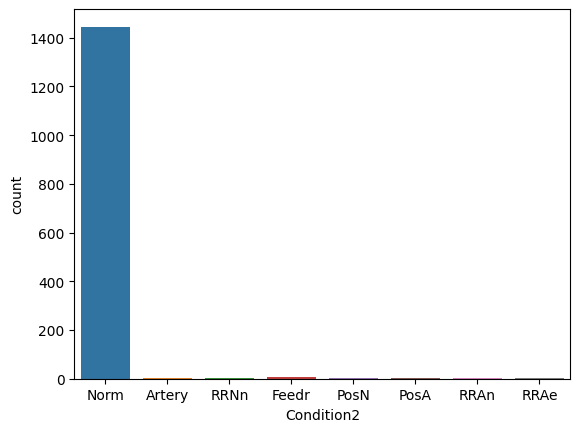

None
          BldgType      Ratio
BldgType                     
1Fam          1220  83.561644
TwnhsE         114   7.808219
Duplex          52   3.561644
Twnhs           43   2.945205
2fmCon          31   2.123288
##########################################


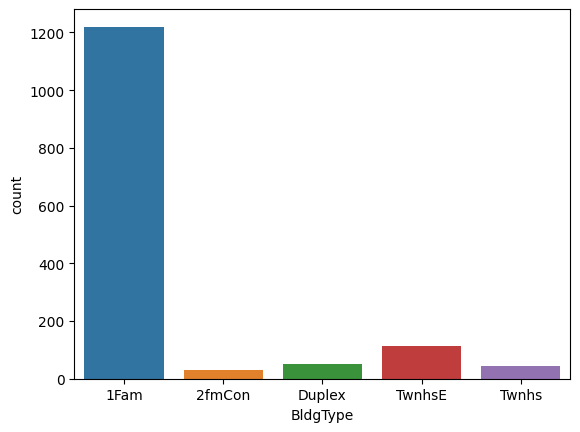

None
            HouseStyle      Ratio
HouseStyle                       
1Story             726  49.726027
2Story             445  30.479452
1.5Fin             154  10.547945
SLvl                65   4.452055
SFoyer              37   2.534247
1.5Unf              14   0.958904
2.5Unf              11   0.753425
2.5Fin               8   0.547945
##########################################


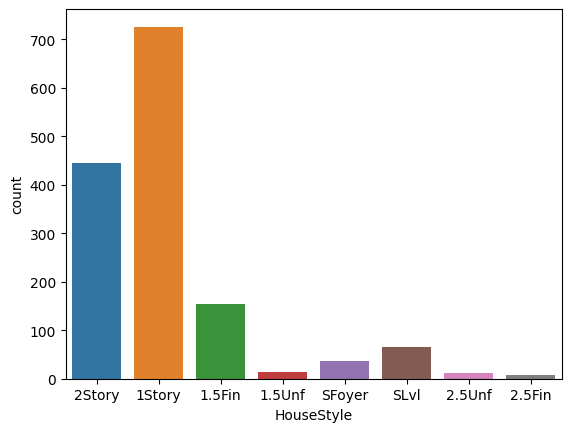

None
           RoofStyle      Ratio
RoofStyle                      
Gable           1141  78.150685
Hip              286  19.589041
Flat              13   0.890411
Gambrel           11   0.753425
Mansard            7   0.479452
Shed               2   0.136986
##########################################


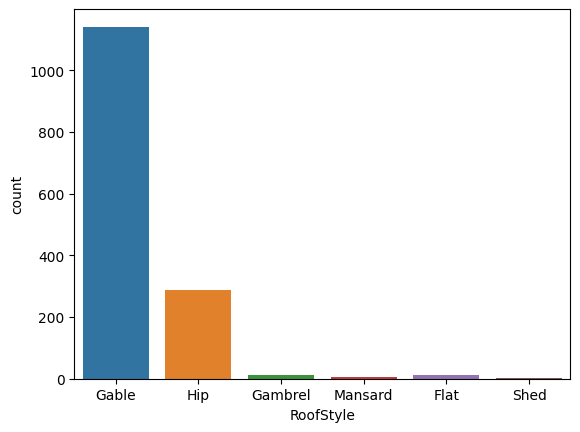

None
          RoofMatl      Ratio
RoofMatl                     
CompShg       1434  98.219178
Tar&Grv         11   0.753425
WdShngl          6   0.410959
WdShake          5   0.342466
Metal            1   0.068493
Membran          1   0.068493
Roll             1   0.068493
ClyTile          1   0.068493
##########################################


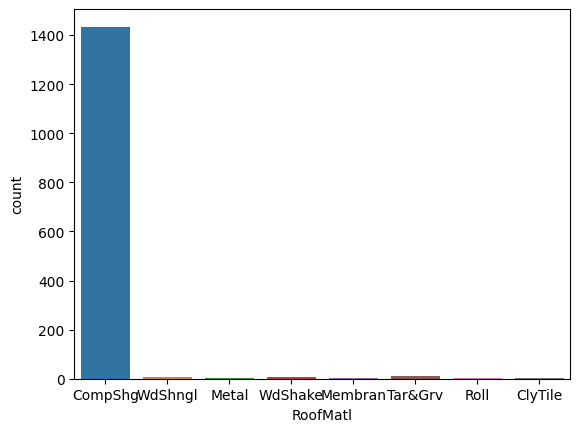

None
             Exterior1st      Ratio
Exterior1st                        
VinylSd              515  35.273973
HdBoard              222  15.205479
MetalSd              220  15.068493
Wd Sdng              206  14.109589
Plywood              108   7.397260
CemntBd               61   4.178082
BrkFace               50   3.424658
WdShing               26   1.780822
Stucco                25   1.712329
AsbShng               20   1.369863
BrkComm                2   0.136986
Stone                  2   0.136986
AsphShn                1   0.068493
ImStucc                1   0.068493
CBlock                 1   0.068493
##########################################


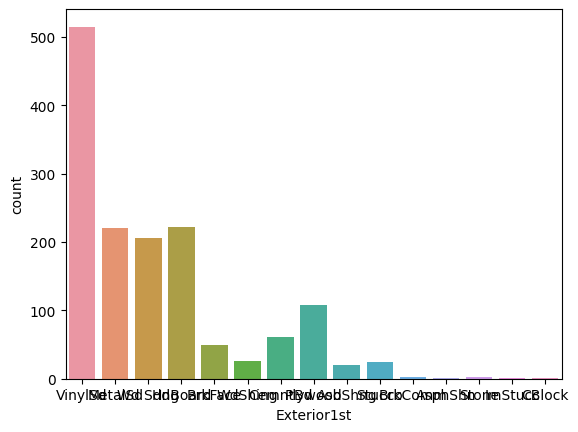

None
             Exterior2nd      Ratio
Exterior2nd                        
VinylSd              504  34.520548
MetalSd              214  14.657534
HdBoard              207  14.178082
Wd Sdng              197  13.493151
Plywood              142   9.726027
CmentBd               60   4.109589
Wd Shng               38   2.602740
Stucco                26   1.780822
BrkFace               25   1.712329
AsbShng               20   1.369863
ImStucc               10   0.684932
Brk Cmn                7   0.479452
Stone                  5   0.342466
AsphShn                3   0.205479
Other                  1   0.068493
CBlock                 1   0.068493
##########################################


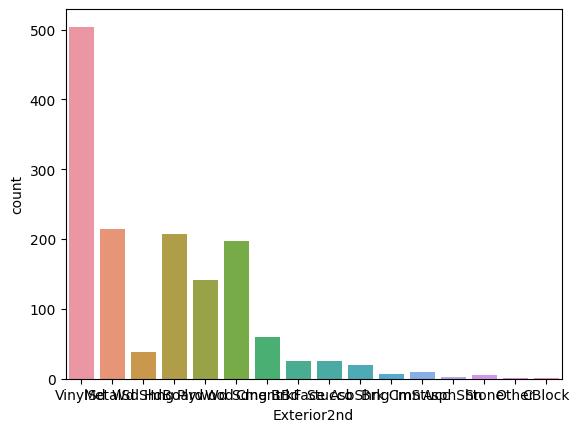

None
            MasVnrType      Ratio
MasVnrType                       
BrkFace            445  30.479452
Stone              128   8.767123
BrkCmn              15   1.027397
##########################################


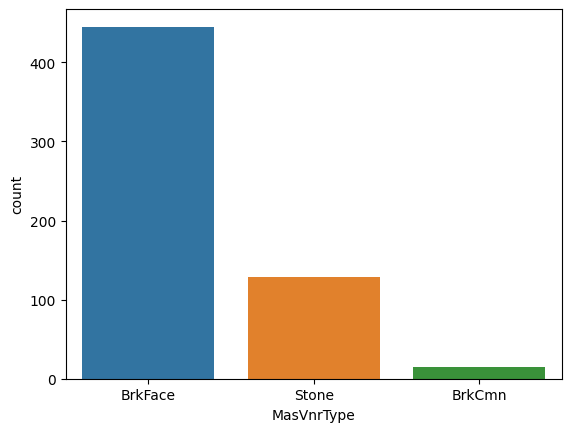

None
           ExterQual      Ratio
ExterQual                      
TA               906  62.054795
Gd               488  33.424658
Ex                52   3.561644
Fa                14   0.958904
##########################################


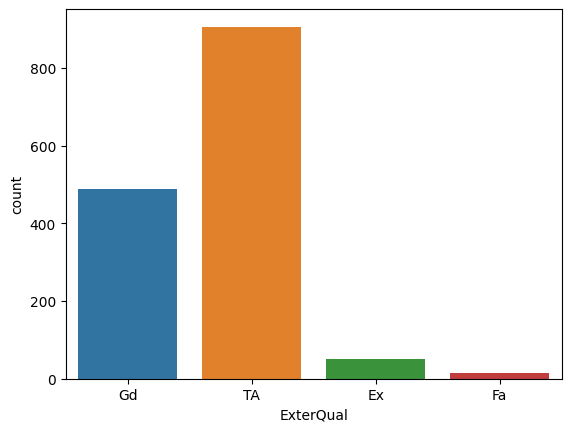

None
           ExterCond      Ratio
ExterCond                      
TA              1282  87.808219
Gd               146  10.000000
Fa                28   1.917808
Ex                 3   0.205479
Po                 1   0.068493
##########################################


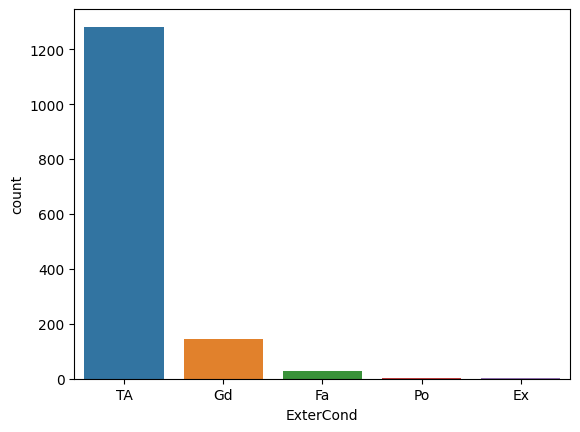

None
            Foundation      Ratio
Foundation                       
PConc              647  44.315068
CBlock             634  43.424658
BrkTil             146  10.000000
Slab                24   1.643836
Stone                6   0.410959
Wood                 3   0.205479
##########################################


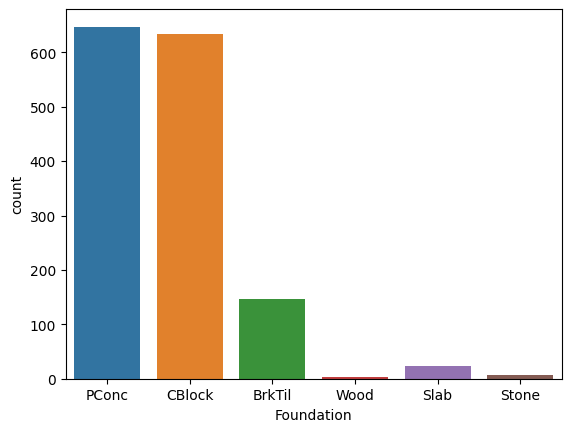

None
          BsmtQual      Ratio
BsmtQual                     
TA             649  44.452055
Gd             618  42.328767
Ex             121   8.287671
Fa              35   2.397260
##########################################


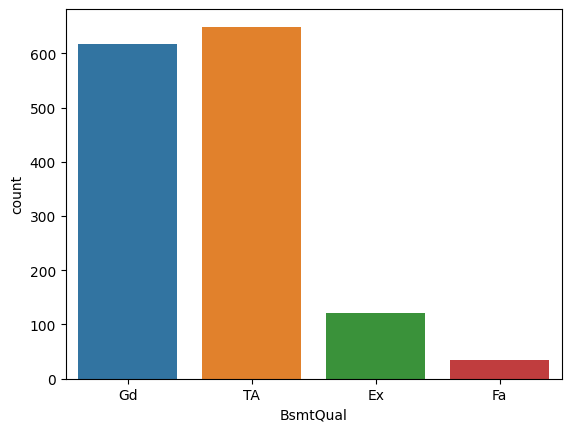

None
          BsmtCond      Ratio
BsmtCond                     
TA            1311  89.794521
Gd              65   4.452055
Fa              45   3.082192
Po               2   0.136986
##########################################


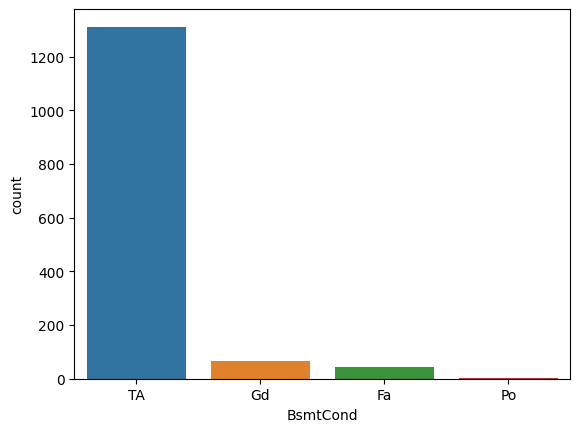

None
              BsmtExposure      Ratio
BsmtExposure                         
No                     953  65.273973
Av                     221  15.136986
Gd                     134   9.178082
Mn                     114   7.808219
##########################################


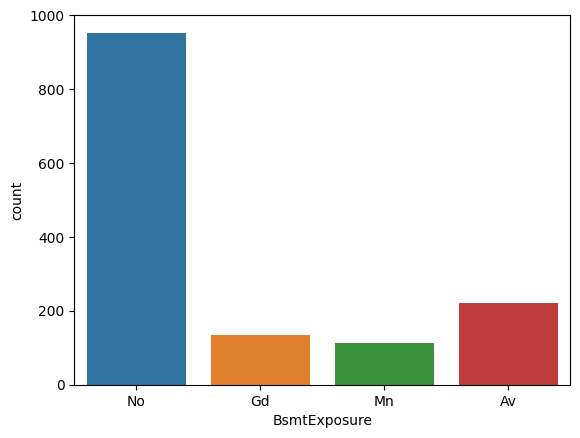

None
              BsmtFinType1      Ratio
BsmtFinType1                         
Unf                    430  29.452055
GLQ                    418  28.630137
ALQ                    220  15.068493
BLQ                    148  10.136986
Rec                    133   9.109589
LwQ                     74   5.068493
##########################################


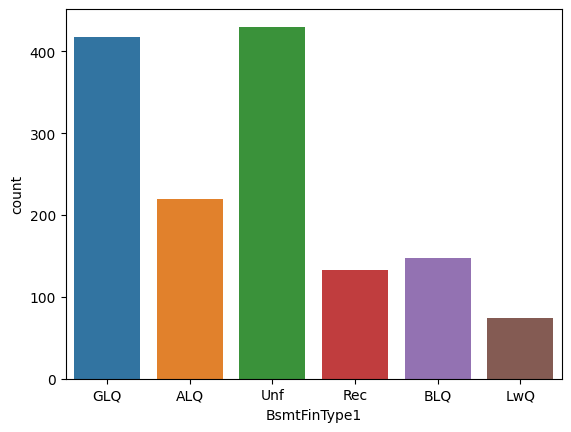

None
              BsmtFinType2      Ratio
BsmtFinType2                         
Unf                   1256  86.027397
Rec                     54   3.698630
LwQ                     46   3.150685
BLQ                     33   2.260274
ALQ                     19   1.301370
GLQ                     14   0.958904
##########################################


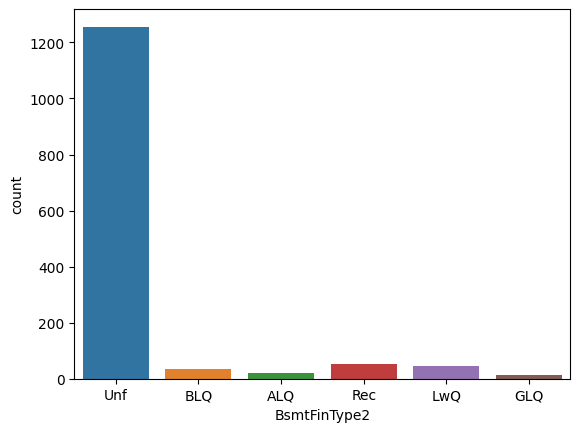

None
         Heating      Ratio
Heating                    
GasA        1428  97.808219
GasW          18   1.232877
Grav           7   0.479452
Wall           4   0.273973
OthW           2   0.136986
Floor          1   0.068493
##########################################


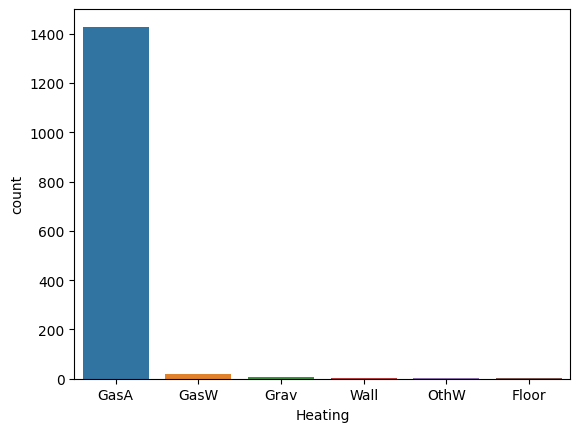

None
           HeatingQC      Ratio
HeatingQC                      
Ex               741  50.753425
TA               428  29.315068
Gd               241  16.506849
Fa                49   3.356164
Po                 1   0.068493
##########################################


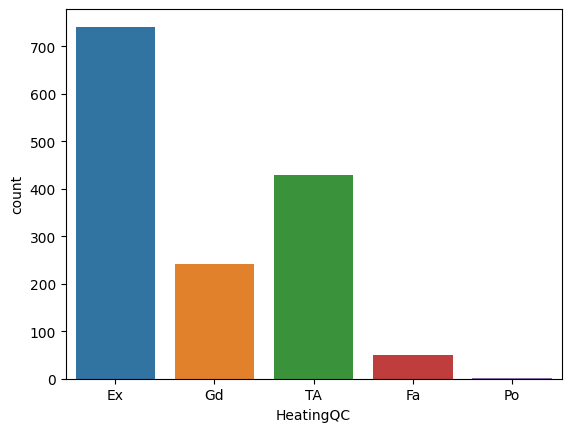

None
            CentralAir      Ratio
CentralAir                       
Y                 1365  93.493151
N                   95   6.506849
##########################################


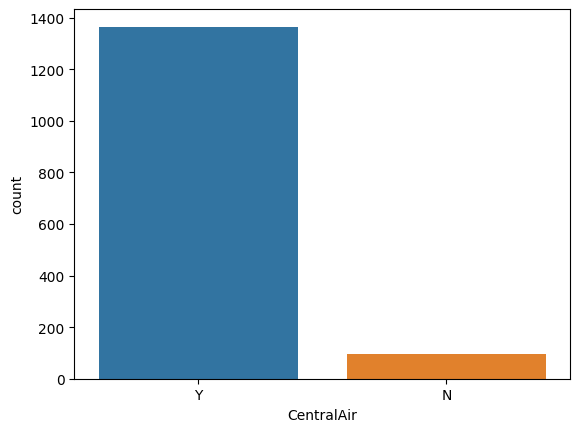

None
            Electrical      Ratio
Electrical                       
SBrkr             1334  91.369863
FuseA               94   6.438356
FuseF               27   1.849315
FuseP                3   0.205479
Mix                  1   0.068493
##########################################


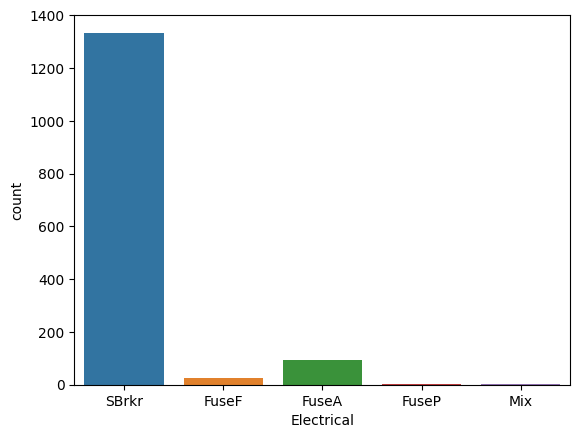

None
             KitchenQual      Ratio
KitchenQual                        
TA                   735  50.342466
Gd                   586  40.136986
Ex                   100   6.849315
Fa                    39   2.671233
##########################################


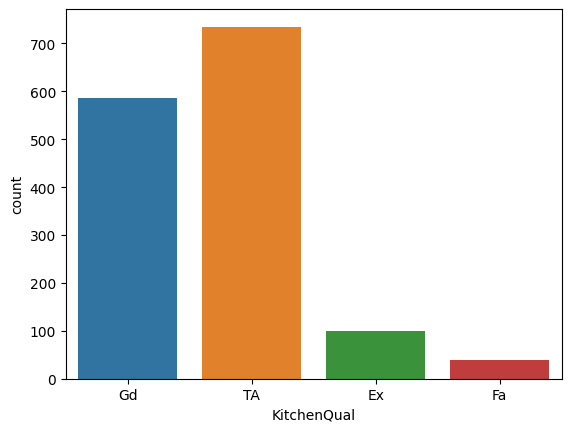

None
            Functional      Ratio
Functional                       
Typ               1360  93.150685
Min2                34   2.328767
Min1                31   2.123288
Mod                 15   1.027397
Maj1                14   0.958904
Maj2                 5   0.342466
Sev                  1   0.068493
##########################################


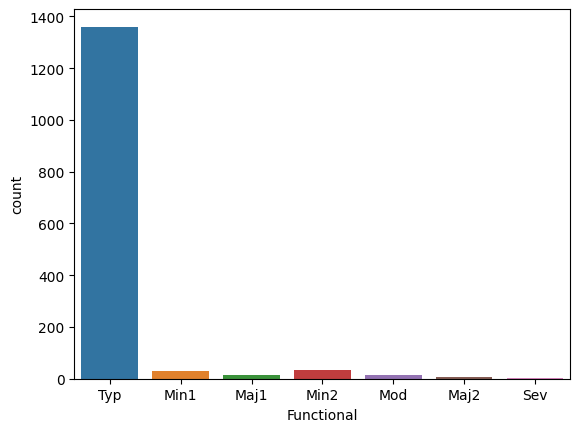

None
             FireplaceQu      Ratio
FireplaceQu                        
Gd                   380  26.027397
TA                   313  21.438356
Fa                    33   2.260274
Ex                    24   1.643836
Po                    20   1.369863
##########################################


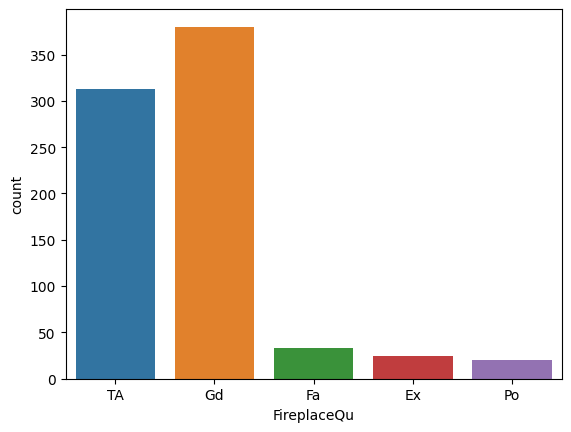

None
            GarageType      Ratio
GarageType                       
Attchd             870  59.589041
Detchd             387  26.506849
BuiltIn             88   6.027397
Basment             19   1.301370
CarPort              9   0.616438
2Types               6   0.410959
##########################################


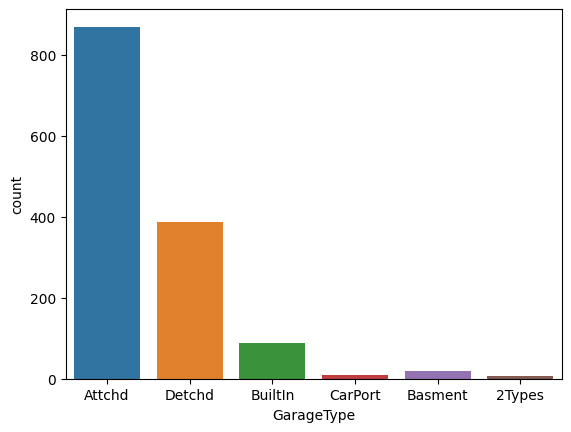

None
              GarageFinish      Ratio
GarageFinish                         
Unf                    605  41.438356
RFn                    422  28.904110
Fin                    352  24.109589
##########################################


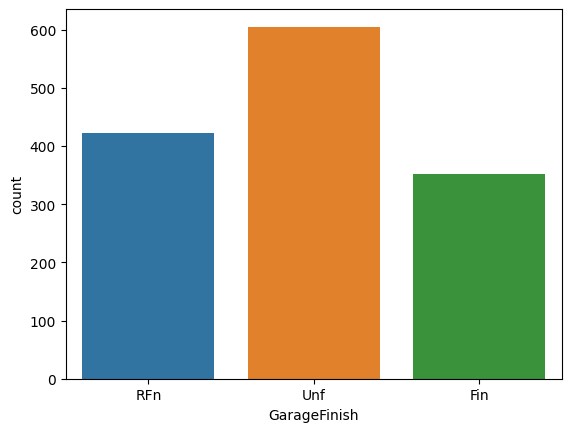

None
            GarageQual      Ratio
GarageQual                       
TA                1311  89.794521
Fa                  48   3.287671
Gd                  14   0.958904
Ex                   3   0.205479
Po                   3   0.205479
##########################################


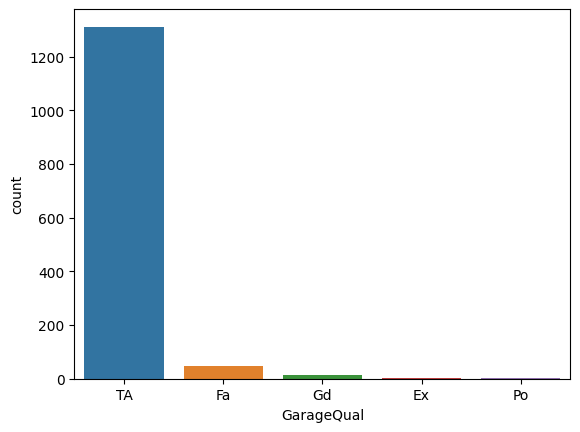

None
            GarageCond      Ratio
GarageCond                       
TA                1326  90.821918
Fa                  35   2.397260
Gd                   9   0.616438
Po                   7   0.479452
Ex                   2   0.136986
##########################################


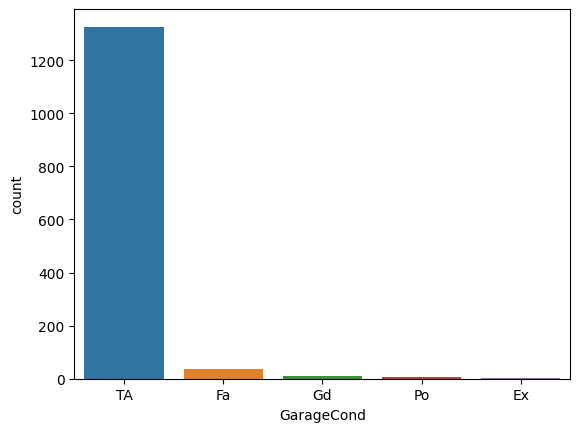

None
            PavedDrive      Ratio
PavedDrive                       
Y                 1340  91.780822
N                   90   6.164384
P                   30   2.054795
##########################################


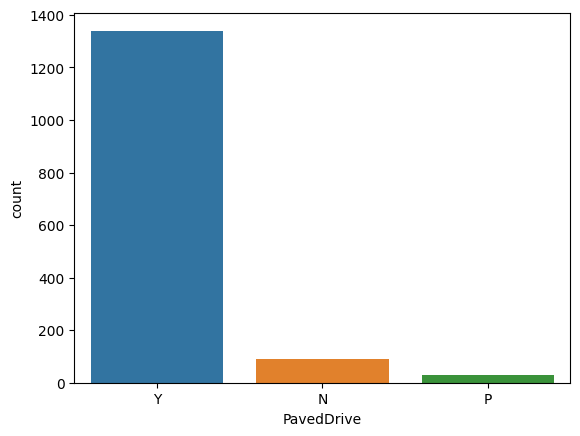

None
        PoolQC     Ratio
PoolQC                  
Gd           3  0.205479
Ex           2  0.136986
Fa           2  0.136986
##########################################


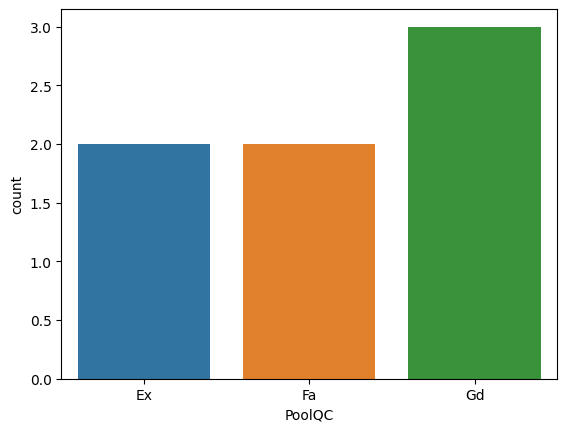

None
       Fence      Ratio
Fence                  
MnPrv    157  10.753425
GdPrv     59   4.041096
GdWo      54   3.698630
MnWw      11   0.753425
##########################################


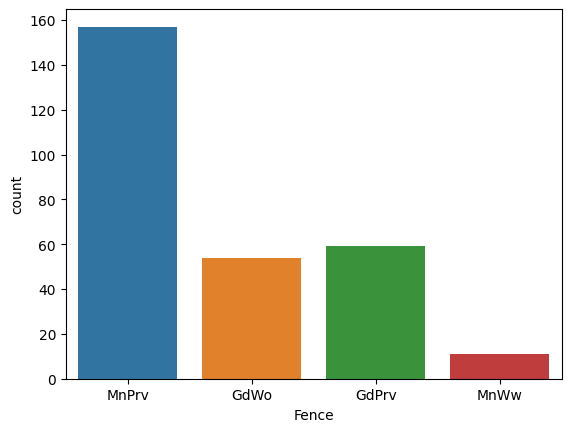

None
             MiscFeature     Ratio
MiscFeature                       
Shed                  49  3.356164
Gar2                   2  0.136986
Othr                   2  0.136986
TenC                   1  0.068493
##########################################


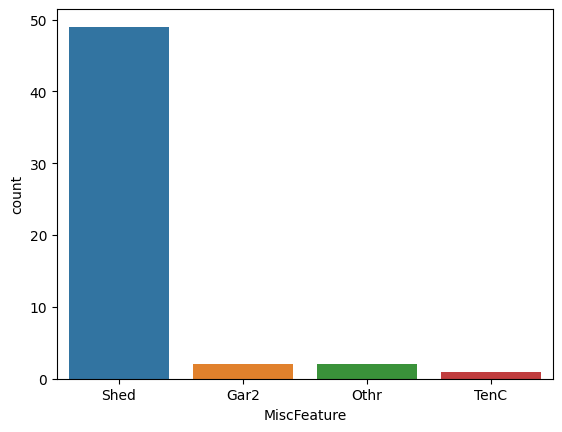

None
          SaleType      Ratio
SaleType                     
WD            1267  86.780822
New            122   8.356164
COD             43   2.945205
ConLD            9   0.616438
ConLI            5   0.342466
ConLw            5   0.342466
CWD              4   0.273973
Oth              3   0.205479
Con              2   0.136986
##########################################


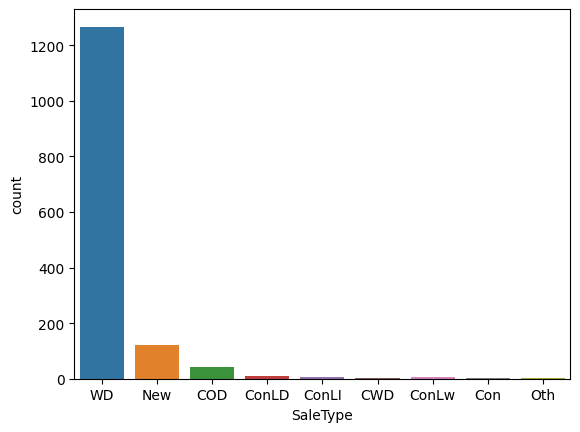

None
               SaleCondition      Ratio
SaleCondition                          
Normal                  1198  82.054795
Partial                  125   8.561644
Abnorml                  101   6.917808
Family                    20   1.369863
Alloca                    12   0.821918
AdjLand                    4   0.273973
##########################################


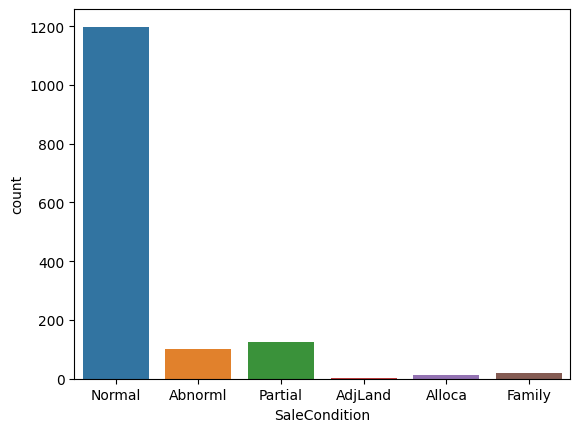

None
            MSSubClass      Ratio
MSSubClass                       
20                 536  36.712329
60                 299  20.479452
50                 144   9.863014
120                 87   5.958904
30                  69   4.726027
160                 63   4.315068
70                  60   4.109589
80                  58   3.972603
90                  52   3.561644
190                 30   2.054795
85                  20   1.369863
75                  16   1.095890
45                  12   0.821918
180                 10   0.684932
40                   4   0.273973
##########################################


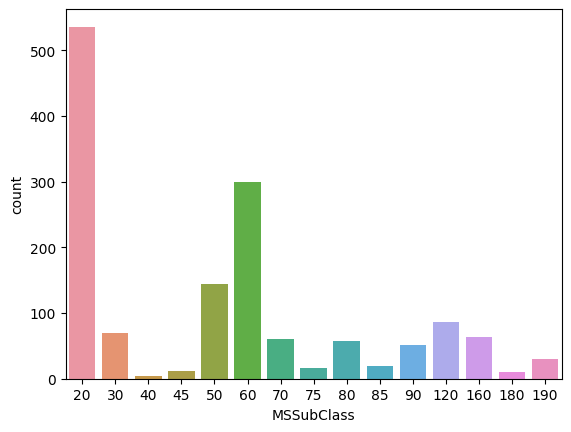

None
             OverallQual      Ratio
OverallQual                        
5                    397  27.191781
6                    374  25.616438
7                    319  21.849315
8                    168  11.506849
4                    116   7.945205
9                     43   2.945205
3                     20   1.369863
10                    18   1.232877
2                      3   0.205479
1                      2   0.136986
##########################################


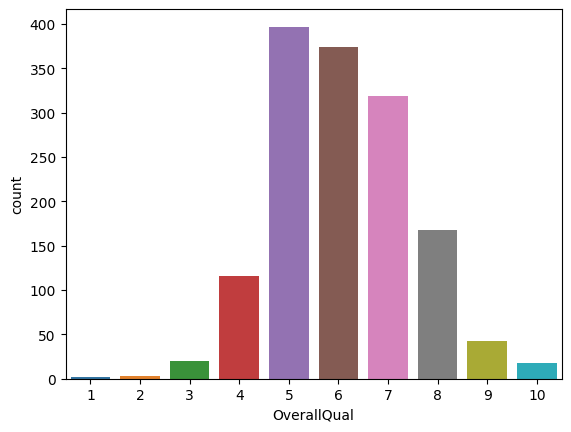

None
             OverallCond      Ratio
OverallCond                        
5                    821  56.232877
6                    252  17.260274
7                    205  14.041096
8                     72   4.931507
4                     57   3.904110
3                     25   1.712329
9                     22   1.506849
2                      5   0.342466
1                      1   0.068493
##########################################


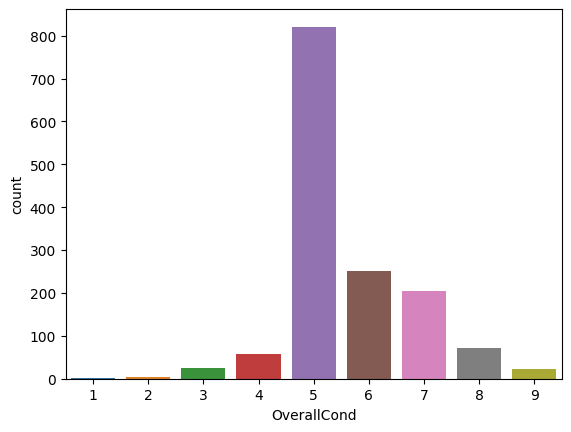

None
              LowQualFinSF      Ratio
LowQualFinSF                         
0                     1434  98.219178
80                       3   0.205479
360                      2   0.136986
205                      1   0.068493
479                      1   0.068493
397                      1   0.068493
514                      1   0.068493
120                      1   0.068493
481                      1   0.068493
232                      1   0.068493
53                       1   0.068493
515                      1   0.068493
156                      1   0.068493
473                      1   0.068493
420                      1   0.068493
390                      1   0.068493
371                      1   0.068493
392                      1   0.068493
144                      1   0.068493
572                      1   0.068493
528                      1   0.068493
234                      1   0.068493
513                      1   0.068493
384                      1   0.068493
#######

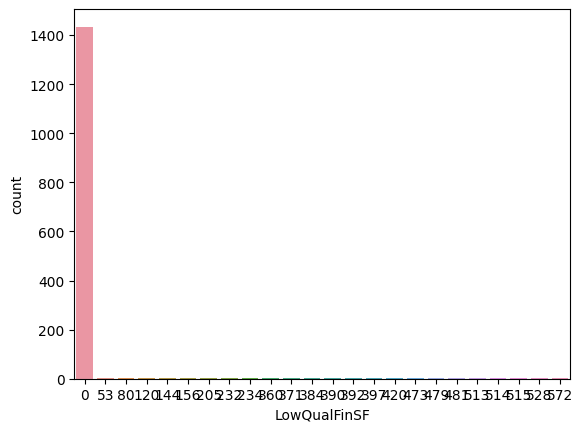

None
              BsmtFullBath      Ratio
BsmtFullBath                         
0                      856  58.630137
1                      588  40.273973
2                       15   1.027397
3                        1   0.068493
##########################################


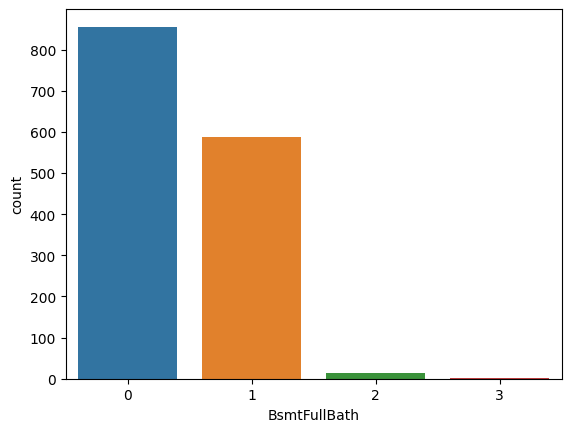

None
              BsmtHalfBath      Ratio
BsmtHalfBath                         
0                     1378  94.383562
1                       80   5.479452
2                        2   0.136986
##########################################


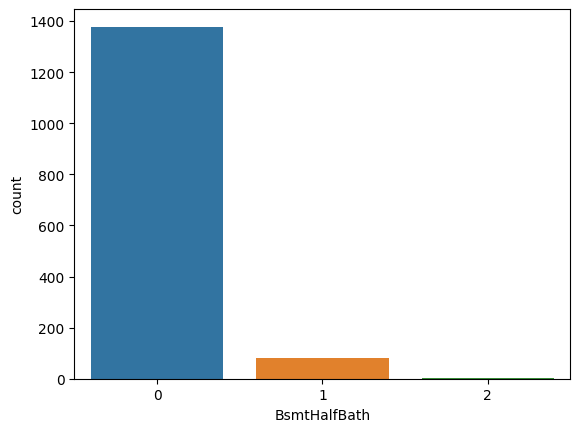

None
          FullBath      Ratio
FullBath                     
2              768  52.602740
1              650  44.520548
3               33   2.260274
0                9   0.616438
##########################################


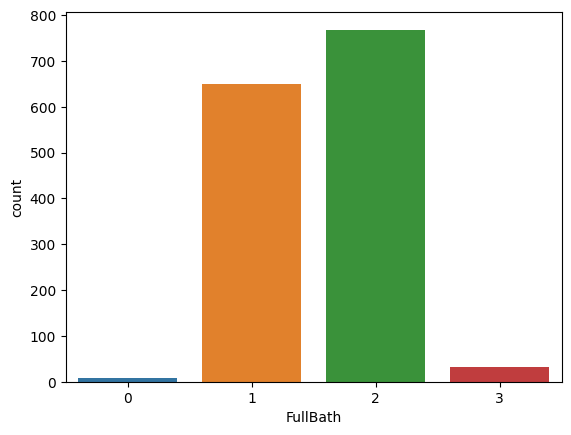

None
          HalfBath      Ratio
HalfBath                     
0              913  62.534247
1              535  36.643836
2               12   0.821918
##########################################


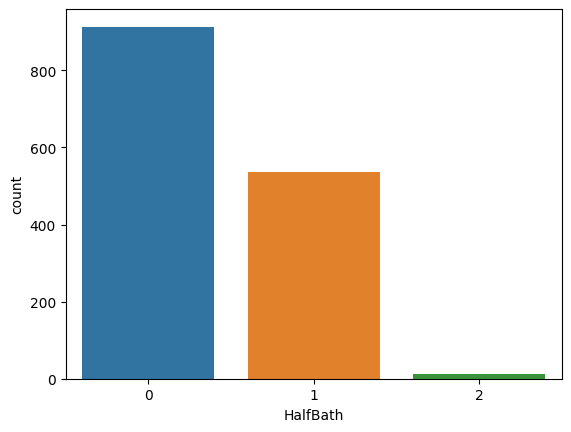

None
              BedroomAbvGr      Ratio
BedroomAbvGr                         
3                      804  55.068493
2                      358  24.520548
4                      213  14.589041
1                       50   3.424658
5                       21   1.438356
6                        7   0.479452
0                        6   0.410959
8                        1   0.068493
##########################################


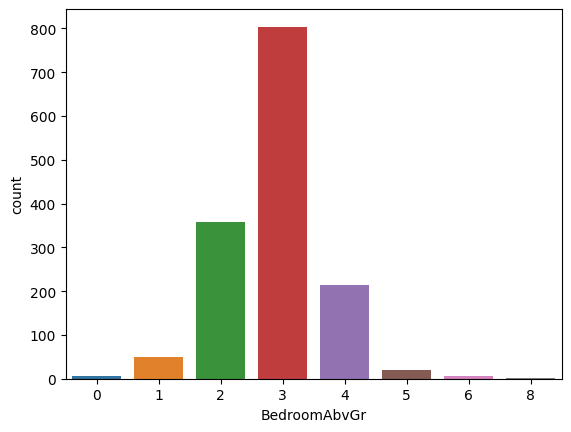

None
              KitchenAbvGr      Ratio
KitchenAbvGr                         
1                     1392  95.342466
2                       65   4.452055
3                        2   0.136986
0                        1   0.068493
##########################################


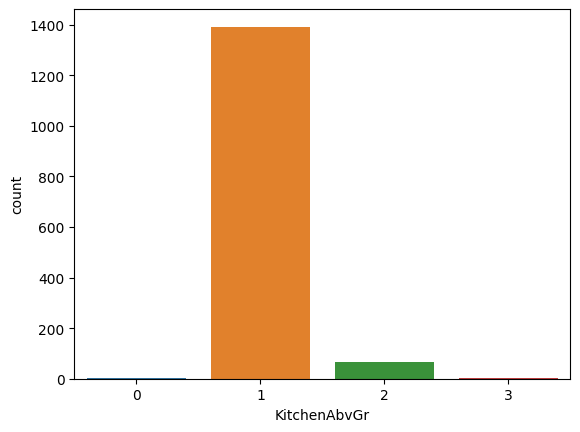

None
              TotRmsAbvGrd      Ratio
TotRmsAbvGrd                         
6                      402  27.534247
7                      329  22.534247
5                      275  18.835616
8                      187  12.808219
4                       97   6.643836
9                       75   5.136986
10                      47   3.219178
11                      18   1.232877
3                       17   1.164384
12                      11   0.753425
2                        1   0.068493
14                       1   0.068493
##########################################


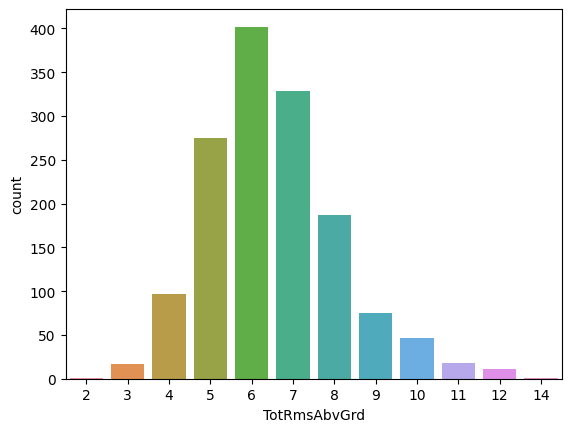

None
            Fireplaces      Ratio
Fireplaces                       
0                  690  47.260274
1                  650  44.520548
2                  115   7.876712
3                    5   0.342466
##########################################


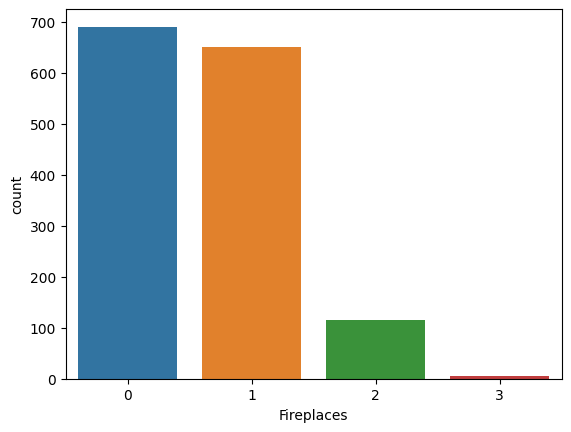

None
            GarageCars      Ratio
GarageCars                       
2                  824  56.438356
1                  369  25.273973
3                  181  12.397260
0                   81   5.547945
4                    5   0.342466
##########################################


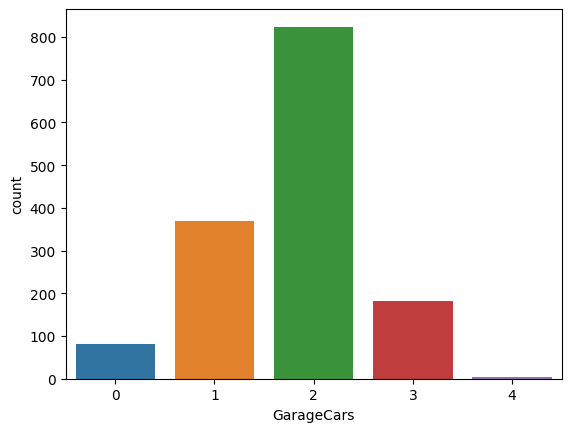

None
           3SsnPorch      Ratio
3SsnPorch                      
0               1436  98.356164
168                3   0.205479
144                2   0.136986
180                2   0.136986
216                2   0.136986
290                1   0.068493
153                1   0.068493
96                 1   0.068493
23                 1   0.068493
162                1   0.068493
182                1   0.068493
196                1   0.068493
320                1   0.068493
245                1   0.068493
238                1   0.068493
508                1   0.068493
140                1   0.068493
130                1   0.068493
407                1   0.068493
304                1   0.068493
##########################################


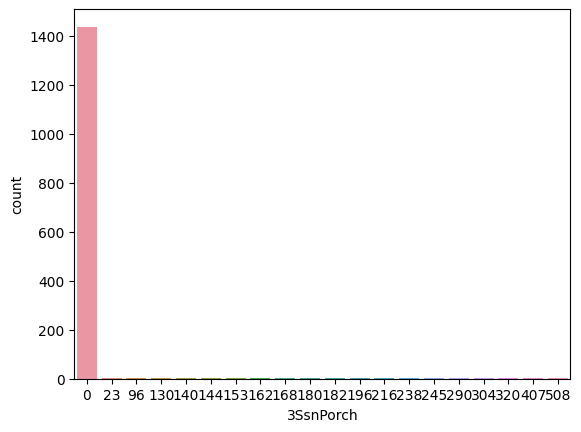

None
          PoolArea      Ratio
PoolArea                     
0             1453  99.520548
512              1   0.068493
648              1   0.068493
576              1   0.068493
555              1   0.068493
480              1   0.068493
519              1   0.068493
738              1   0.068493
##########################################


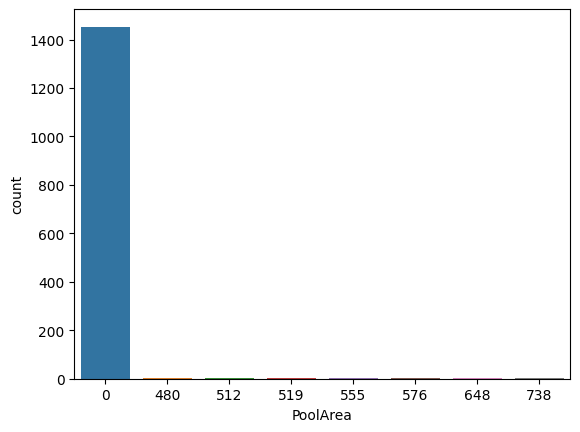

None
         MiscVal      Ratio
MiscVal                    
0           1408  96.438356
400           11   0.753425
500            8   0.547945
700            5   0.342466
450            4   0.273973
600            4   0.273973
2000           4   0.273973
1200           2   0.136986
480            2   0.136986
15500          1   0.068493
800            1   0.068493
350            1   0.068493
3500           1   0.068493
1300           1   0.068493
54             1   0.068493
620            1   0.068493
560            1   0.068493
1400           1   0.068493
8300           1   0.068493
1150           1   0.068493
2500           1   0.068493
##########################################


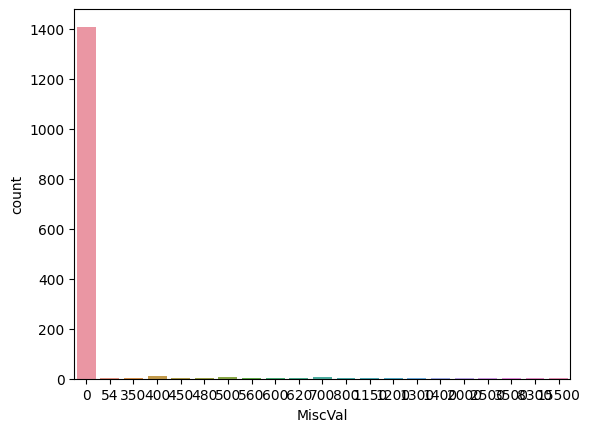

None
        MoSold      Ratio
MoSold                   
6          253  17.328767
7          234  16.027397
5          204  13.972603
4          141   9.657534
8          122   8.356164
3          106   7.260274
10          89   6.095890
11          79   5.410959
9           63   4.315068
12          59   4.041096
1           58   3.972603
2           52   3.561644
##########################################


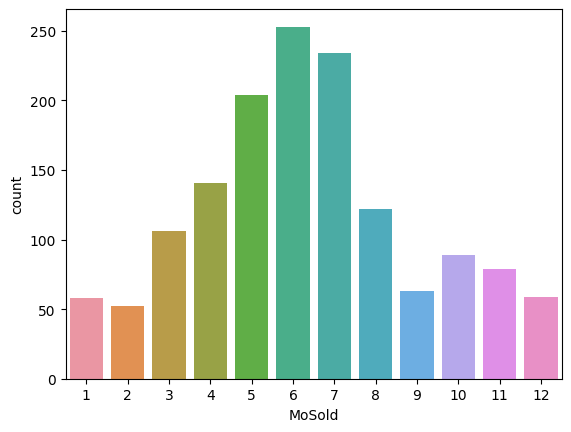

None
        YrSold      Ratio
YrSold                   
2009       338  23.150685
2007       329  22.534247
2006       314  21.506849
2008       304  20.821918
2010       175  11.986301
##########################################


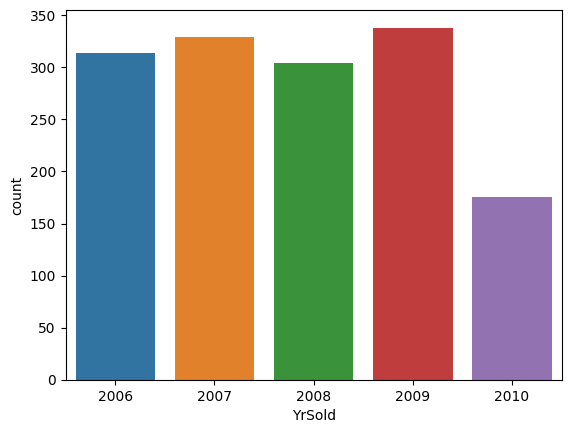

None


In [11]:
for col in train_cat_cols:
    print(cat_summary(train_df,col,True))

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
5%         73.950000
10%       146.900000
20%       292.800000
30%       438.700000
40%       584.600000
50%       730.500000
60%       876.400000
70%      1022.300000
80%      1168.200000
90%      1314.100000
95%      1387.050000
99%      1445.410000
max      1460.000000
Name: Id, dtype: float64


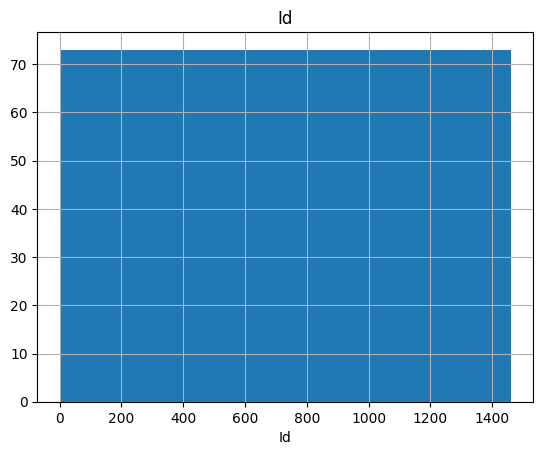

None
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64


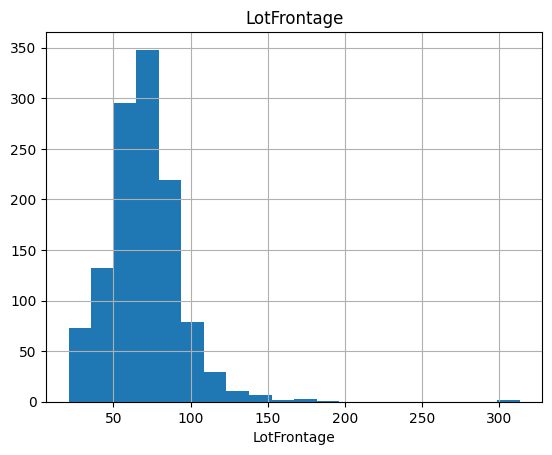

None
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


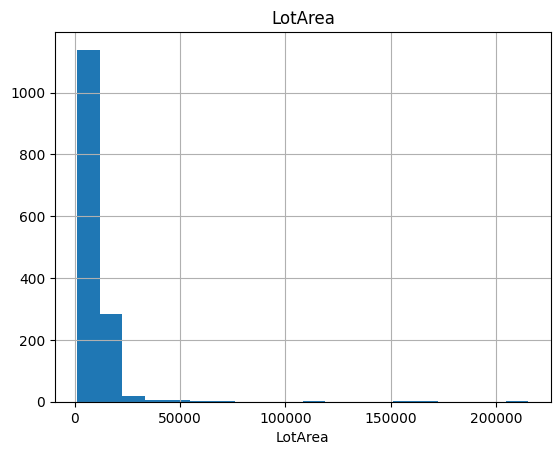

None
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
5%       1916.000000
10%      1924.900000
20%      1947.800000
30%      1958.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1997.300000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearBuilt, dtype: float64


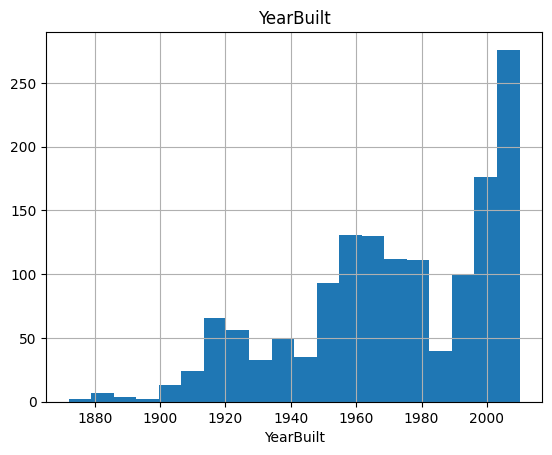

None
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1961.800000
30%      1971.000000
40%      1980.000000
50%      1994.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


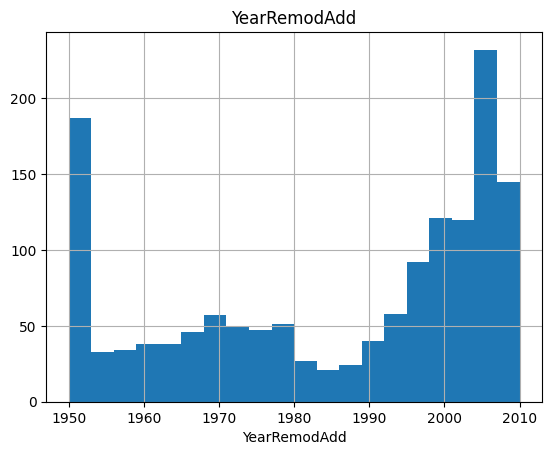

None
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        16.000000
70%       117.000000
80%       206.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64


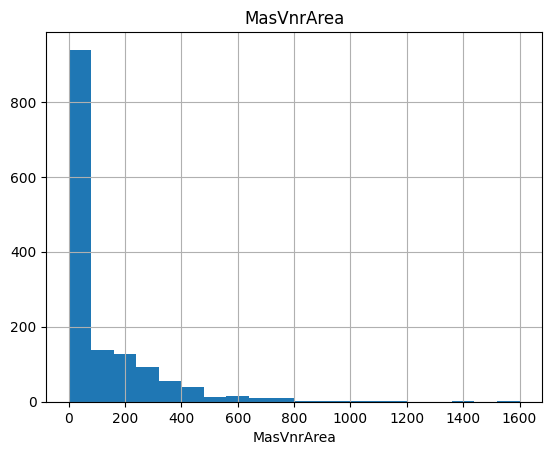

None
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       218.600000
50%       383.500000
60%       525.600000
70%       655.000000
80%       806.400000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


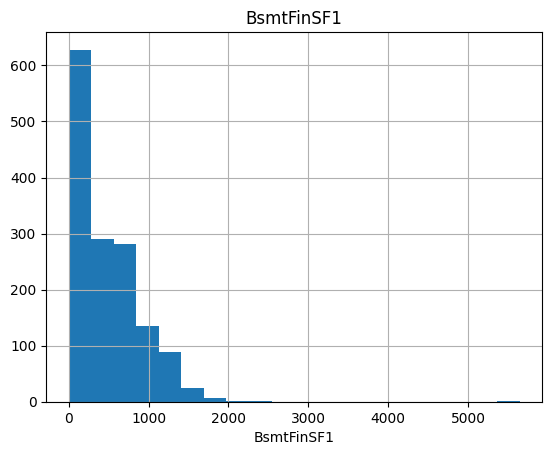

None
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


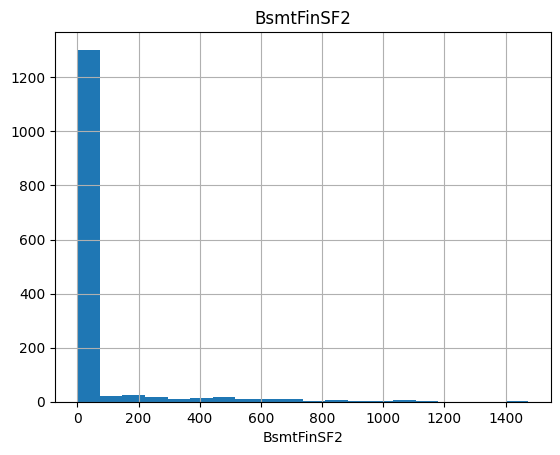

None
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
20%       172.000000
30%       280.000000
40%       374.600000
50%       477.500000
60%       604.400000
70%       736.000000
80%       896.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


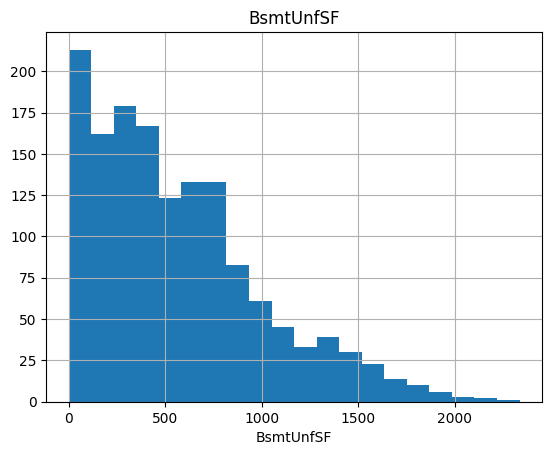

None
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
5%        519.300000
10%       636.900000
20%       755.800000
30%       840.000000
40%       910.000000
50%       991.500000
60%      1088.000000
70%      1216.000000
80%      1391.200000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


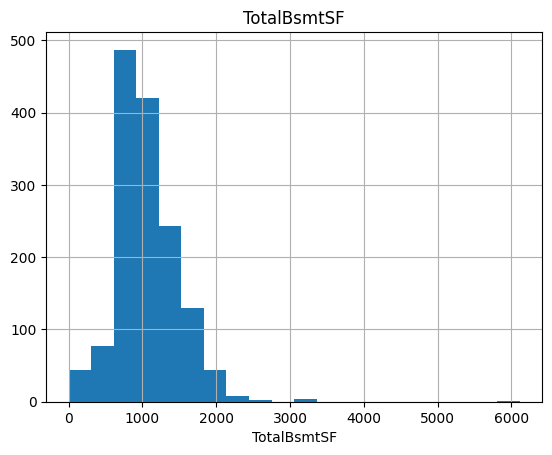

None
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
5%        672.950000
10%       756.900000
20%       848.000000
30%       915.700000
40%      1000.200000
50%      1087.000000
60%      1182.000000
70%      1314.000000
80%      1482.400000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64


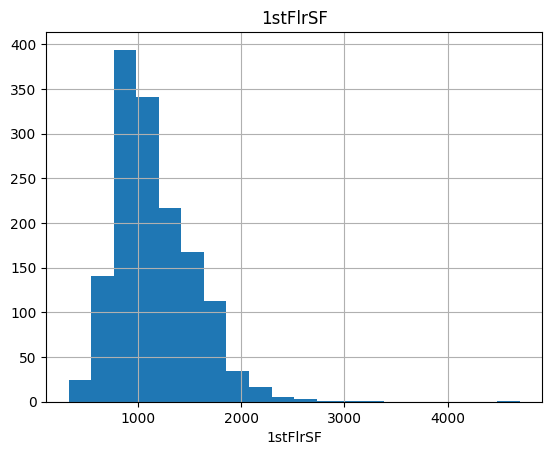

None
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       455.400000
70%       672.000000
80%       796.200000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


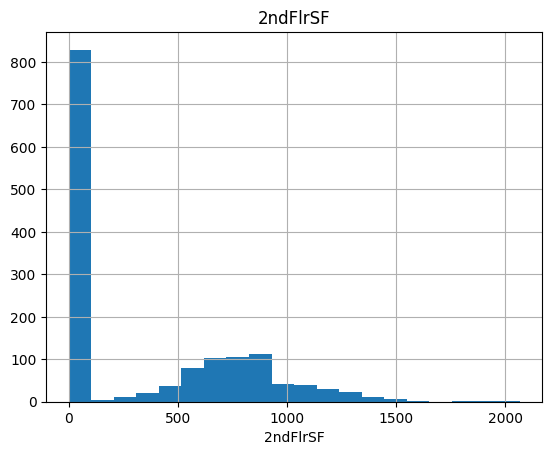

None
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
5%        848.000000
10%       912.000000
20%      1066.600000
30%      1208.000000
40%      1339.000000
50%      1464.000000
60%      1578.000000
70%      1709.300000
80%      1869.000000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


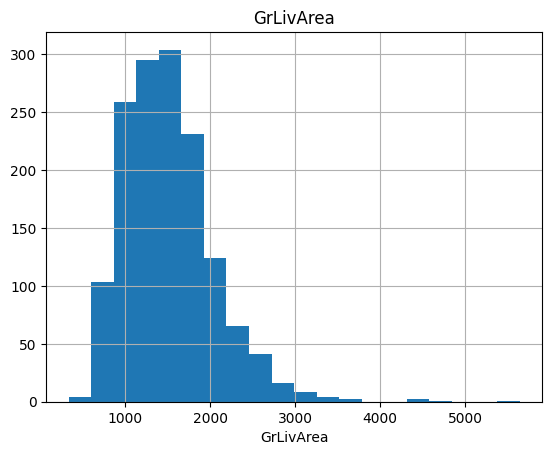

None
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
5%       1930.000000
10%      1945.000000
20%      1957.000000
30%      1965.000000
40%      1973.000000
50%      1980.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


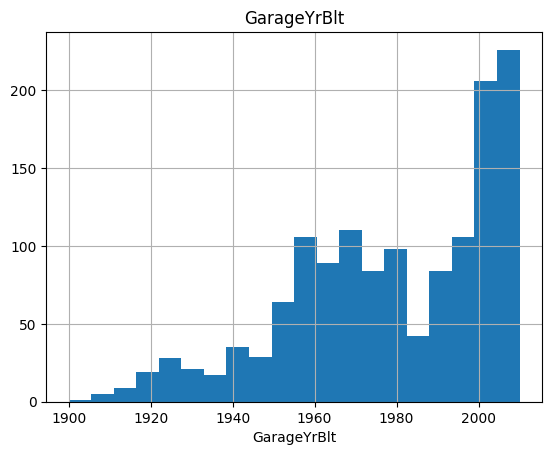

None
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
20%       295.600000
30%       384.000000
40%       440.000000
50%       480.000000
60%       516.000000
70%       560.000000
80%       620.200000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


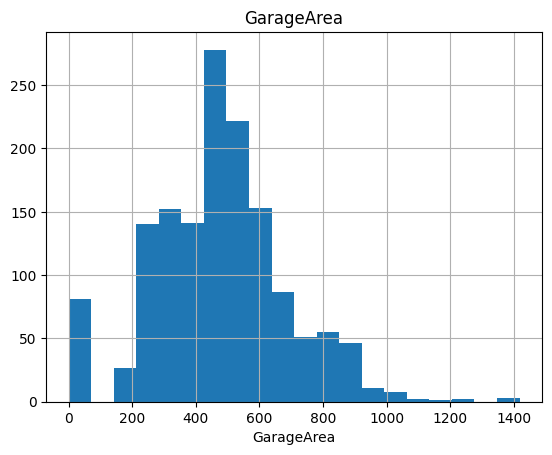

None
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


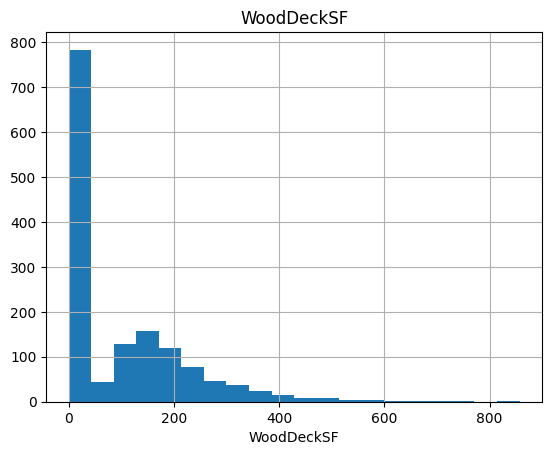

None
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        25.000000
60%        40.000000
70%        57.000000
80%        83.200000
90%       130.000000
95%       175.050000
99%       285.820000
max       547.000000
Name: OpenPorchSF, dtype: float64


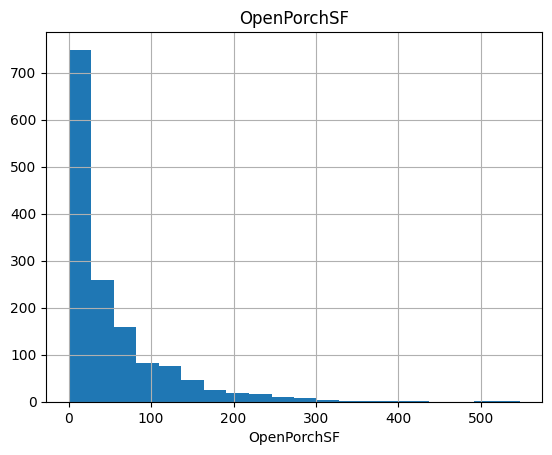

None
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       552.000000
Name: EnclosedPorch, dtype: float64


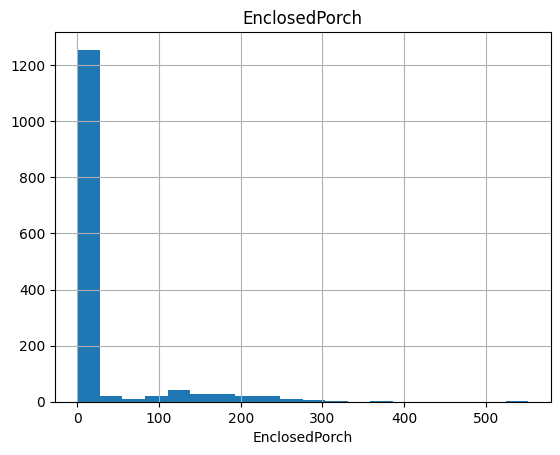

None
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       480.000000
Name: ScreenPorch, dtype: float64


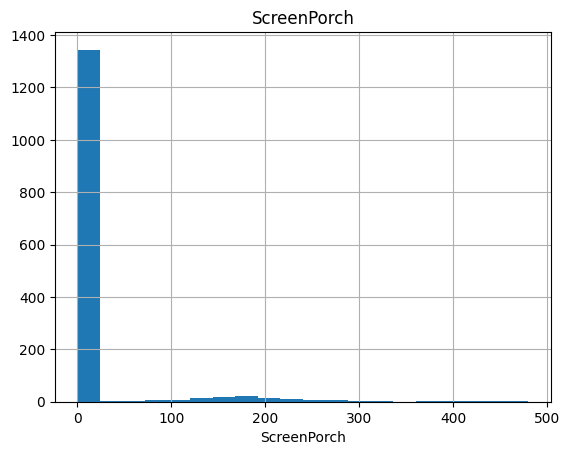

None
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


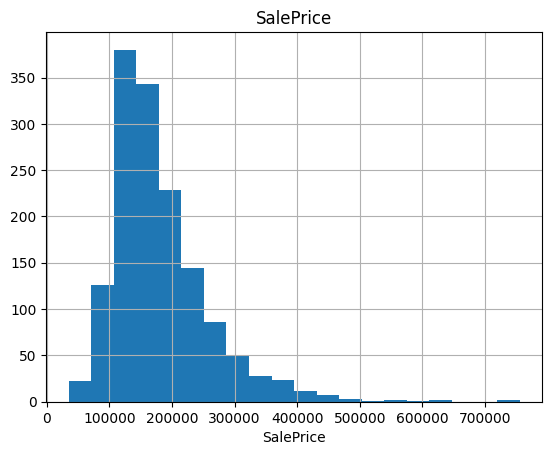

None


In [12]:
for col in train_num_cols:
    print(num_summary(train_df,col,True))

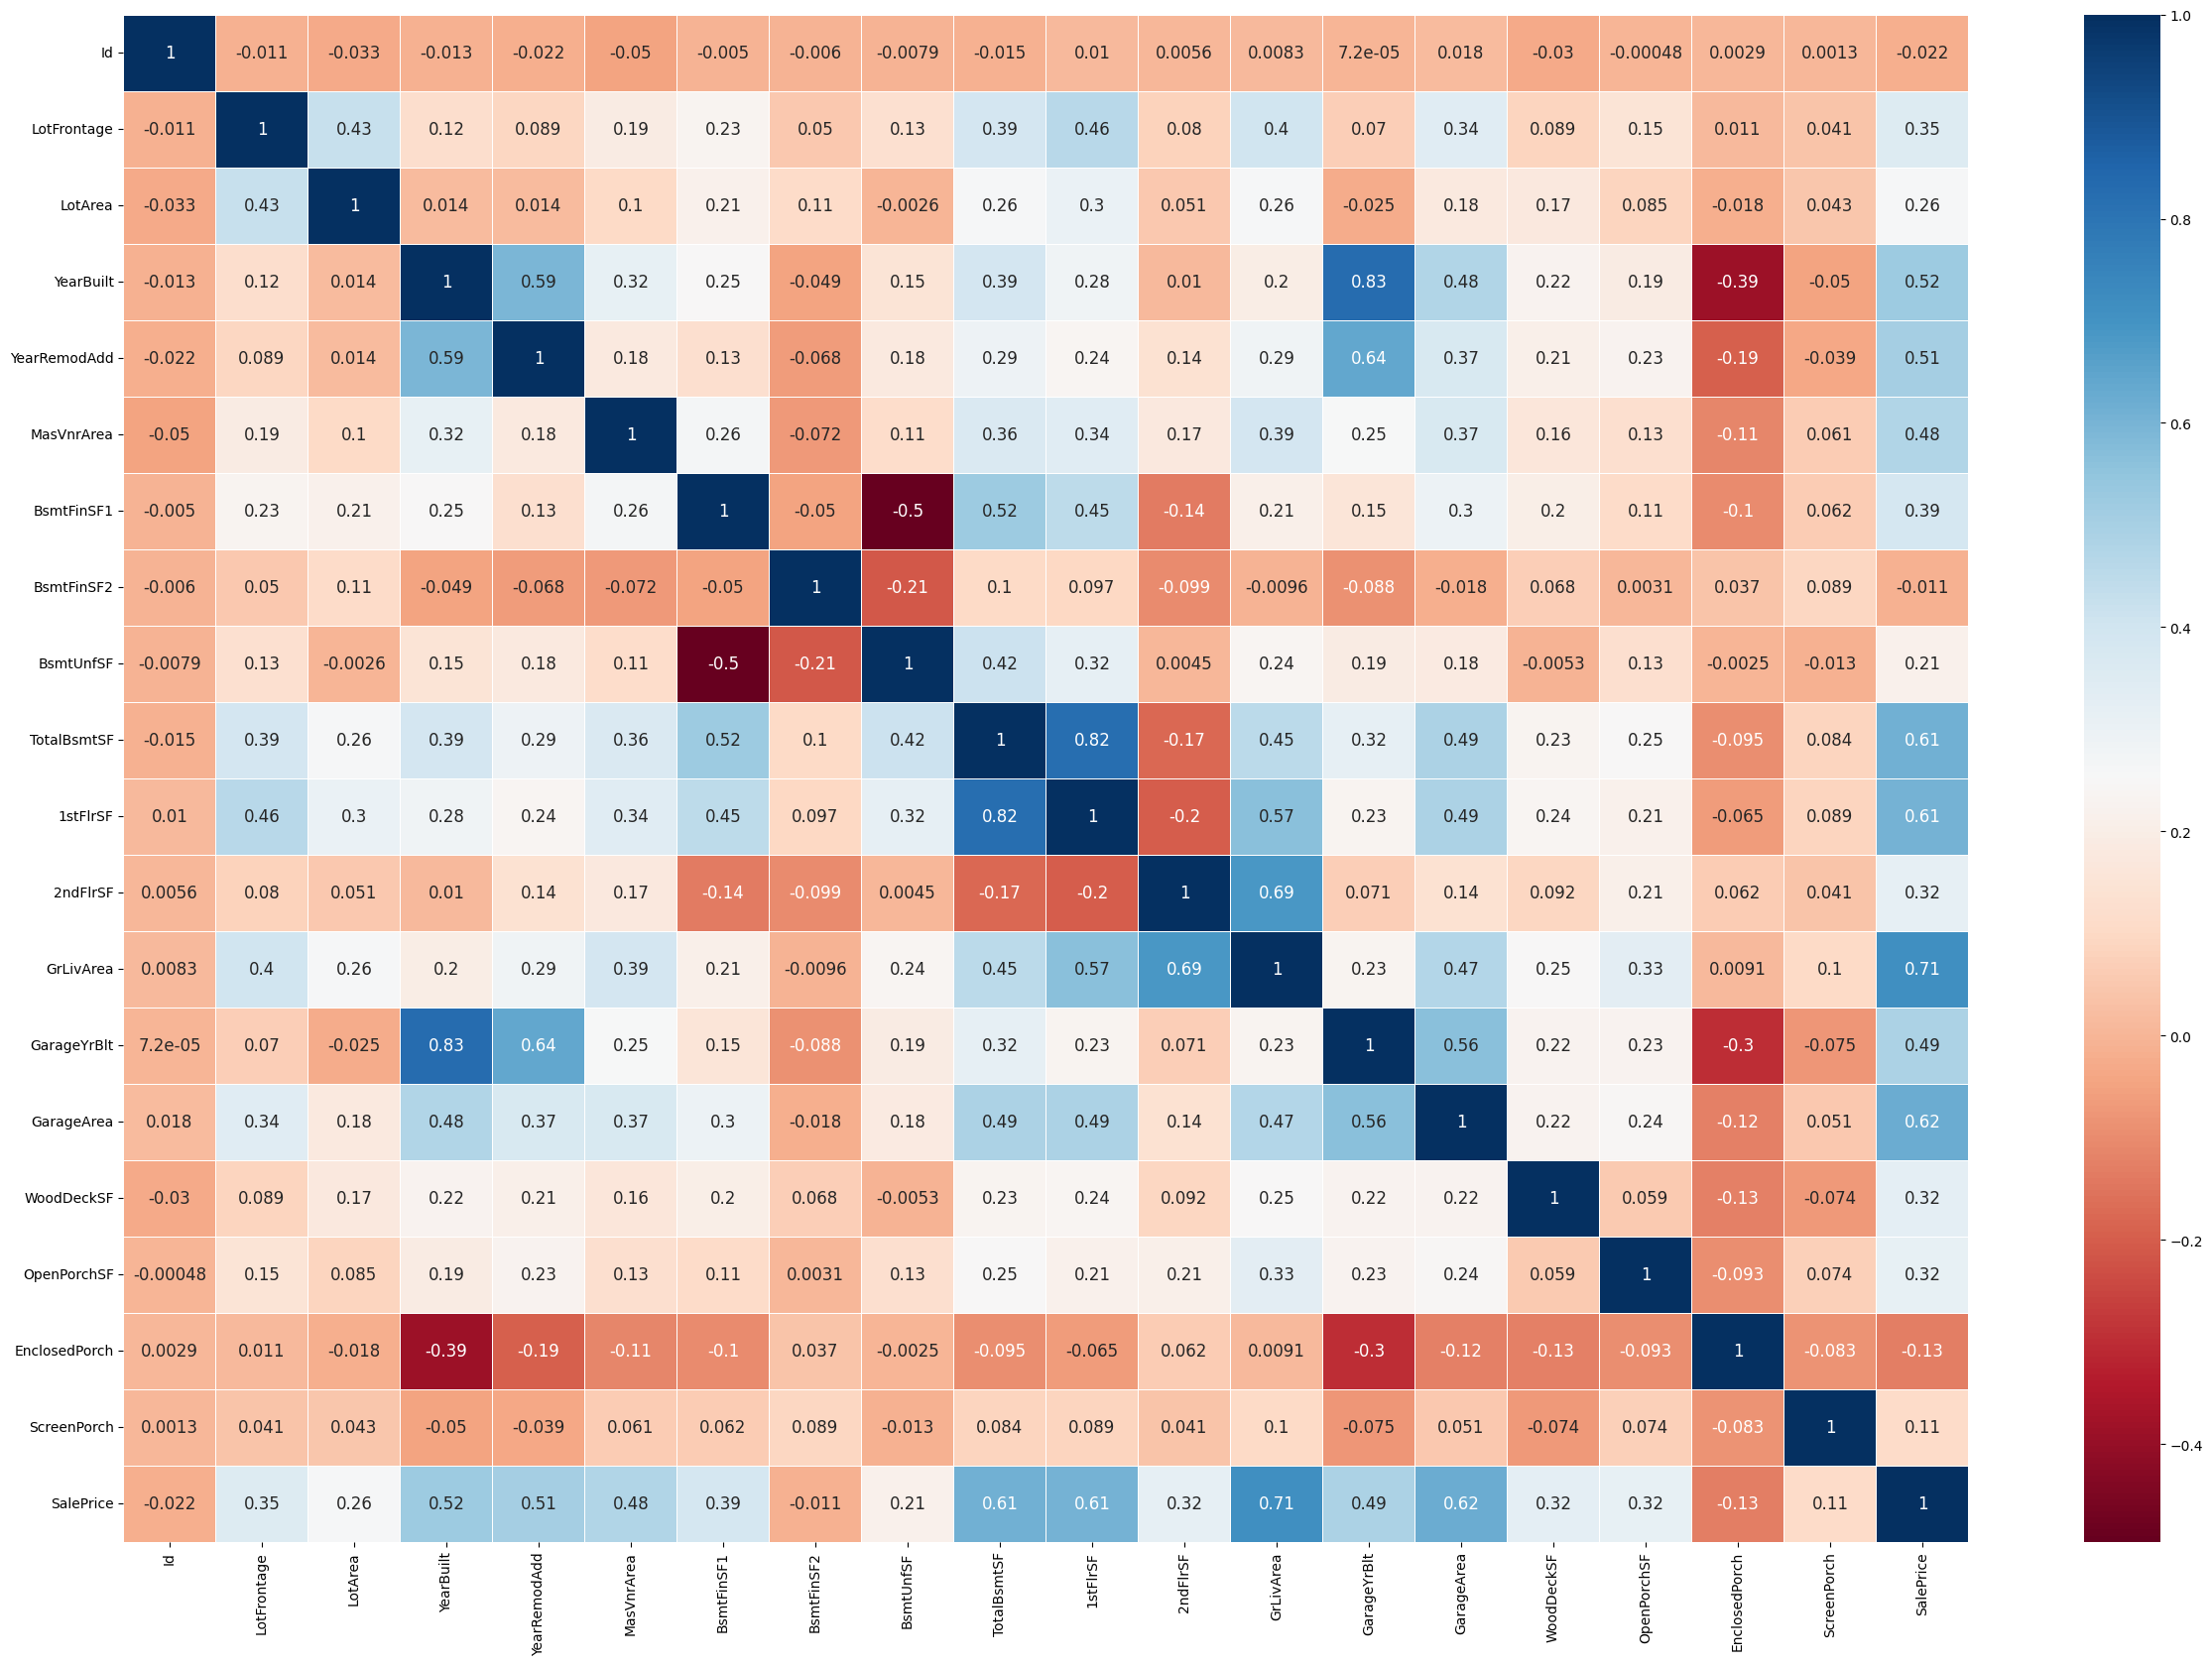

In [13]:
def correlation_matrix(dataframe,cols):    
    fig = plt.gcf()
    fig.set_size_inches(30, 20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

correlation_matrix(train_df,train_num_cols)

In [14]:
from sklearn.impute import KNNImputer

def knn_impute(df, n_neighbors):
    print("Starting KNN Imputation...")
    
    # Sadece tamamen boş olmayan sütunları seç
    non_empty_columns = df.columns[df.isnull().mean() < 1.0]
    df_reduced = df[non_empty_columns].copy()
    print(f"Columns before imputation: {df_reduced.columns.tolist()}")

    # Kategorik sütunları kodla
    categorical_columns = df_reduced.select_dtypes(include='object').columns
    categorical_maps = {}

    # Kategorik sütunları sayısal değerlere çevir ve haritalamayı kaydet
    for col in categorical_columns:
        print(f"Processing categorical column: {col}")
        df_reduced[col] = df_reduced[col].astype('category')
        categorical_maps[col] = dict(enumerate(df_reduced[col].cat.categories))
        df_reduced[col] = df_reduced[col].cat.codes.replace(-1, np.nan)

    # KNN ile eksik değerleri doldur
    print(f"Running KNN Imputer with n_neighbors={n_neighbors}...")
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_reduced), columns=df_reduced.columns)
    print("KNN Imputation completed.")

    # Kategorik verileri orijinal haline döndür
    for col in categorical_columns:
        print(f"Restoring original categories for column: {col}")
        df_imputed[col] = df_imputed[col].round().astype(int).map(categorical_maps[col])

    # Orijinalde olmayan sütunları NaN ile doldur
    for col in df.columns:
        if col not in df_imputed.columns:
            print(f"Filling missing column: {col}")
            df_imputed[col] = np.nan

    # Sütunları orijinal sıraya döndür
    df_imputed = df_imputed[df.columns]
    print("KNN Imputation finished.")
    
    return df_imputed

In [15]:
train_df = knn_impute(train_df, n_neighbors=2)
test_df = knn_impute(test_df, n_neighbors=2)

Starting KNN Imputation...
Columns before imputation: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

In [16]:
train_ohe_cols = [col for col in train_df.columns if 10 >= train_df[col].nunique() > 2]
test_ohe_cols = [col for col in test_df.columns if 10 >= test_df[col].nunique() > 2]
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

one_hot_encoder(train_df,train_ohe_cols)
one_hot_encoder(test_df, test_ohe_cols)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,Utilities,Neighborhood,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,Pave,Grvl,AllPub,NAmes,1961.0,1961.0,...,False,False,False,False,True,False,False,False,True,False
1,1462.0,20.0,81.0,14267.0,Pave,Grvl,AllPub,NAmes,1958.0,1958.0,...,False,False,False,False,True,False,False,False,True,False
2,1463.0,60.0,74.0,13830.0,Pave,Grvl,AllPub,Gilbert,1997.0,1998.0,...,False,False,False,False,True,False,False,False,True,False
3,1464.0,60.0,78.0,9978.0,Pave,Grvl,AllPub,Gilbert,1998.0,1998.0,...,False,False,False,False,True,False,False,False,True,False
4,1465.0,120.0,43.0,5005.0,Pave,Grvl,AllPub,StoneBr,1992.0,1992.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,Pave,Pave,AllPub,MeadowV,1970.0,1970.0,...,False,False,False,False,True,False,False,False,True,False
1455,2916.0,160.0,21.0,1894.0,Pave,Pave,AllPub,MeadowV,1970.0,1970.0,...,False,False,False,False,True,False,False,False,False,False
1456,2917.0,20.0,160.0,20000.0,Pave,Grvl,AllPub,Mitchel,1960.0,1996.0,...,False,False,False,False,True,False,False,False,False,False
1457,2918.0,85.0,62.0,10441.0,Pave,Grvl,AllPub,Mitchel,1992.0,1992.0,...,False,False,False,False,True,False,False,False,True,False


In [17]:
from sklearn.preprocessing import LabelEncoder

def grab_col_names(dataframe, cat_th=30, car_th=40):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes!="O"] 
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and dataframe[col].dtypes=="O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

train_cat_cols, train_num_cols, train_cat_but_car = grab_col_names(train_df)
test_cat_cols, test_num_cols, test_cat_but_car = grab_col_names(test_df)

for col in train_cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])

for col in test_cat_cols:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(train_df[train_num_cols])
train_df[train_num_cols] = pd.DataFrame(X_scaled, columns=train_df[train_num_cols].columns)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,5,3,-0.237557,-0.207142,1,1,3,3,0,...,0,0,2,2,0,1,2,8,4,0.347273
1,-1.728492,0,3,0.381973,-0.091886,1,0,3,3,0,...,0,2,1,2,0,4,1,8,4,0.007288
2,-1.726120,5,3,-0.113651,0.073480,1,1,0,3,0,...,0,0,0,2,0,8,2,8,4,0.536154
3,-1.723747,6,3,-0.444067,-0.096897,1,0,0,3,0,...,0,2,0,2,0,1,0,8,0,-0.515281
4,-1.721374,5,3,0.547181,0.375148,1,0,0,3,0,...,0,0,1,2,0,11,2,8,4,0.869843


In [19]:
X = train_df.drop(["SalePrice"],axis=1)
y = train_df["SalePrice"]

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
xgboost = XGBRegressor().fit(X_train,y_train) 
xgboost_pred = xgboost.predict(X_test)

print(mean_squared_error(xgboost_pred,y_test))
rmse = np.sqrt(mean_squared_error(xgboost_pred, y_test))
print(rmse)

0.11295246512589485
0.3360840149812169


In [21]:
test_df = test_df[train_df.drop(columns=['SalePrice']).columns]

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
# Now you can predict using the transformed test_df
test_pred_prob = xgboost.predict(test_df)

In [22]:
print(f"Length of test_df: {len(test_df)}")
print(f"Length of test_pred_prob: {len(test_pred_prob)}")

Length of test_df: 1459
Length of test_pred_prob: 1459


In [23]:
df_sub = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")

In [24]:
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
df_sub = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_pred_prob
})

df_sub.to_csv('submission.csv', index=False)